### EXERCICE 1 ###

In [1]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', as_frame=False)


In [2]:
#print(mnist) 
#commande qui affiche l'ensemble du dataset en mode verbose (mnist.data et mnist.target)

#print (mnist.data) 
#affiche seulement les data (dont targets)

#print (mnist.target)
#affiche les numéros trouvés

print(len(mnist.data)) 
#affiche les tailles des matrices

#help(len)     
#print (mnist.data.shape) 
#print (mnist.target.shape) 

#mnist.data[0] 

#mnist.data[0][1]

#mnist.data[:,1] 

#mnist.data[:100]


70000


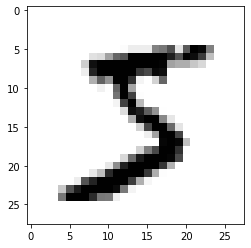

['class']

In [3]:
import matplotlib.pyplot as plt 
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show()

mnist.target_names #affichage classe correspondant à l'image


### EXERCICE 2 ###

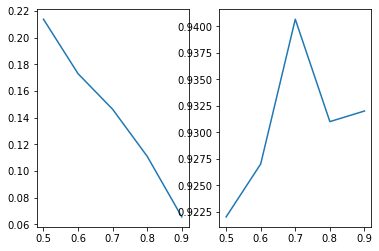

'for i in range(2,15) :\n    temps=0\n    points=0\n    kf = KFold(n_splits=10, shuffle=True)\n    for train_index, test_index in kf.split(data):\n        start=time.time()\n        clf = KNeighborsClassifier (n_neighbors=i, n_jobs=1)\n        #calculer la diff entre n_jobs=-1(all processors) et n_jobs=1( ou none)\n        clf.fit(data[train_index], target[train_index])\n        clf.predict(data[test_index])\n        #print(f"Nombre de voisins: {i}, score : {clf.score(data[test_index], target[test_index])}")\n        end=time.time()\n        #print(f"temps= {end-start}")\n        temps+=end-start\n        points+=clf.score(data[test_index], target[test_index])\n    print(f"average score: {points/50}, average time: {temps/50}")'

In [4]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import DistanceMetric

#Echantillon de 5000 exemples
index=np.random.randint(70000, size=5000)
data=mnist.data[index]
target=mnist.target[index]

#On divise la base à 80% pour l'apprentissage et 20% tests
pourcentage_de_données = 0.8
temps=[]
points=[]
for i in [0.5, 0.6, 0.7, 0.8, 0.9]:

    xtrain,  xtest,  ytrain,  ytest  =  train_test_split(data,  target, train_size=i)
    start=time.time()
    clf = KNeighborsClassifier (n_neighbors=3)
    clf.fit(xtrain, ytrain)
    clf.predict(xtest)
    end=time.time()
    temps.append(end-start)
    points.append(clf.score(xtest, ytest))

plt.figure(1)
plt.subplot(1,2,1)
plt.plot([0.5, 0.6, 0.7, 0.8, 0.9], temps)
plt.subplot(1,2,2)
plt.plot([0.5, 0.6, 0.7, 0.8, 0.9], points)
plt.show()
#On affiche la classe de l'image 4 et sa classe prédite
#print(target[4])
#print(clf.predict([data[4]]))

#Affichage du score de l'échantillon de test
#print(clf.score(xtest, ytest))
                
#Taux d'erreur 
#print(clf.score(xtrain, ytrain))

#Recherche du k optimal
for i in range(2,15) :
    temps=0
    points=0
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(data):
        start=time.time()
        clf = KNeighborsClassifier (n_neighbors=i, n_jobs=1)
        #calculer la diff entre n_jobs=-1(all processors) et n_jobs=1( ou none)
        clf.fit(data[train_index], target[train_index])
        clf.predict(data[test_index])
        #print(f"Nombre de voisins: {i}, score : {clf.score(data[test_index], target[test_index])}")
        end=time.time()
        #print(f"temps= {end-start}")
        temps+=end-start
        points+=clf.score(data[test_index], target[test_index])
    print(f"average score: {points/50}, average time: {temps/50}")
#Chebychev < Manhattan < Euclidienne

#resultat theorique : en parallele plus rapide, mais induit un cout fixe
